*This notebook contains an excerpt (edited/augmented by Vishal Patel) from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas*

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [1]:
from sklearn.datasets import load_digits

# Load data
digits = load_digits()

# Dimensions (shape) of the data
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

In [2]:
# View the first two records

digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

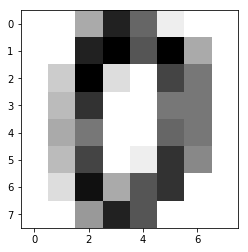

In [3]:
# View the first image

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.images[0], cmap='binary', interpolation='nearest')

In [4]:
# Target value for the first image

digits.target[0]

0

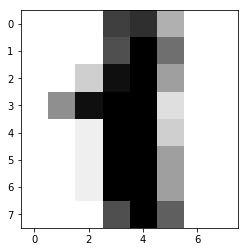

In [5]:
# View the second image

plt.imshow(digits.images[1], cmap='binary', interpolation='nearest')

In [ ]:
# Target value for the second image

digits.target[1]

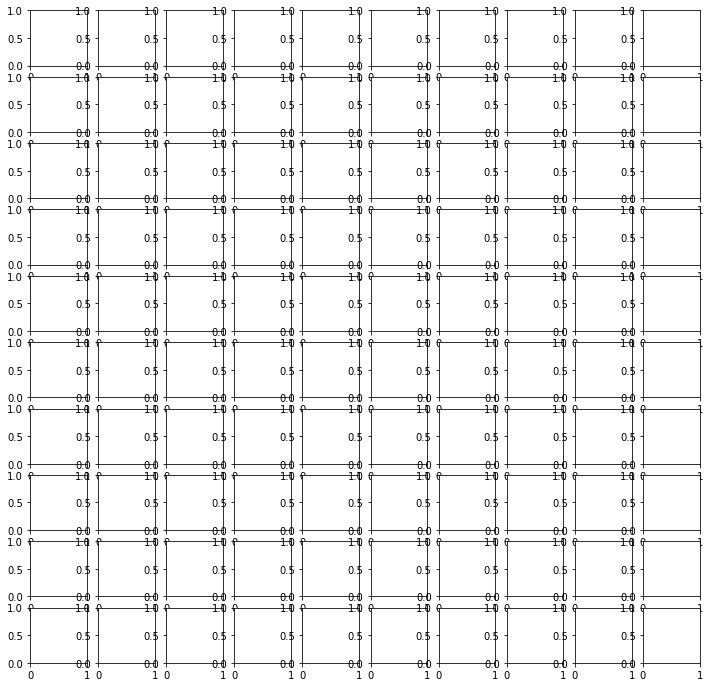

In [6]:
# Create a 10x10 grid (subplots) to view the first 100 images/digits

fig, axes = plt.subplots(10, 10, figsize=(12, 12))

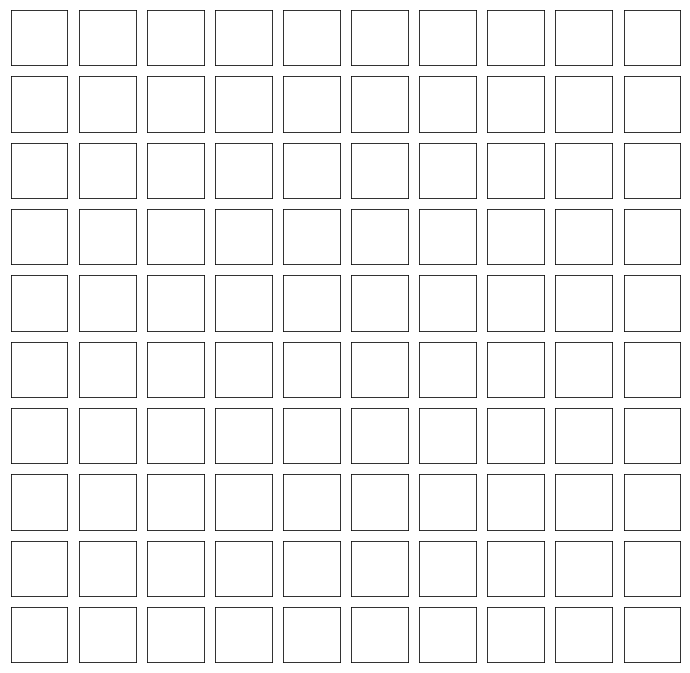

In [7]:
# Remove the axis tick marks (and consequently, labels)

fig, axes = plt.subplots(10, 10, figsize=(12, 12),
                         subplot_kw={'xticks':[], 'yticks':[]})

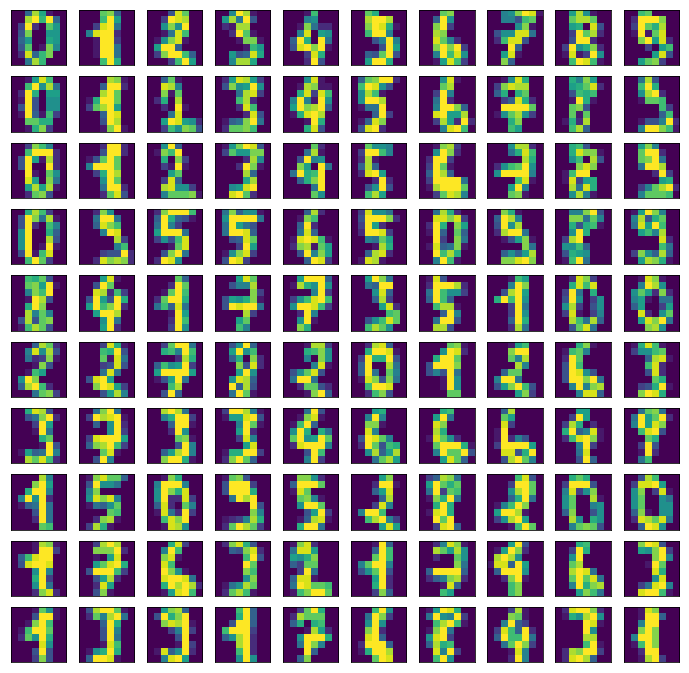

In [8]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12),
                         subplot_kw={'xticks':[], 'yticks':[]})

# Iterate thru the subplots and use imshow() to plot images
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i])

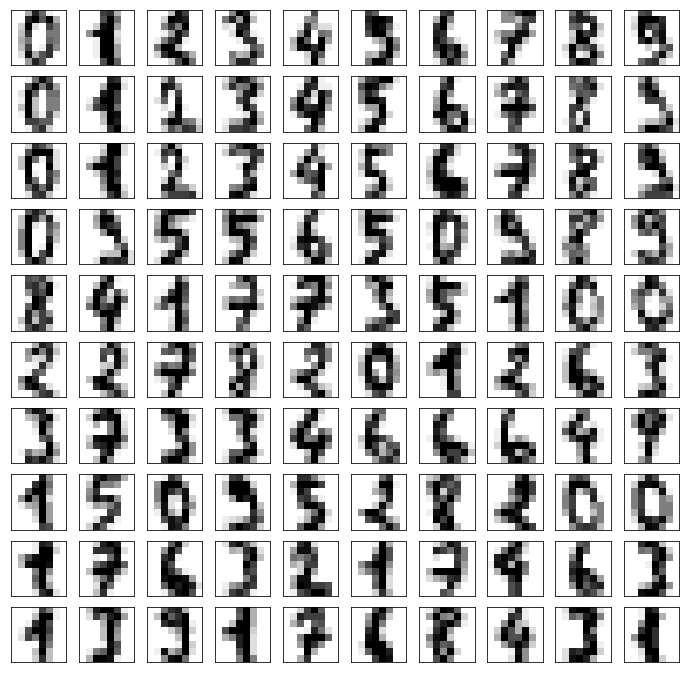

In [9]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12),
                         subplot_kw={'xticks':[], 'yticks':[]})

# Change the color-map to a black and white spectrum
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')

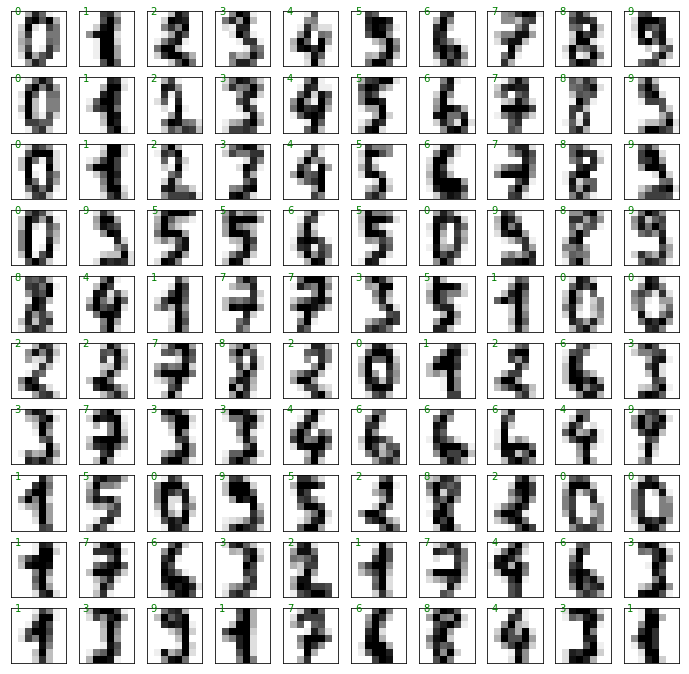

In [10]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12),
                         subplot_kw={'xticks':[], 'yticks':[]})

# Include the target value (digit) for each image
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]),color='green')

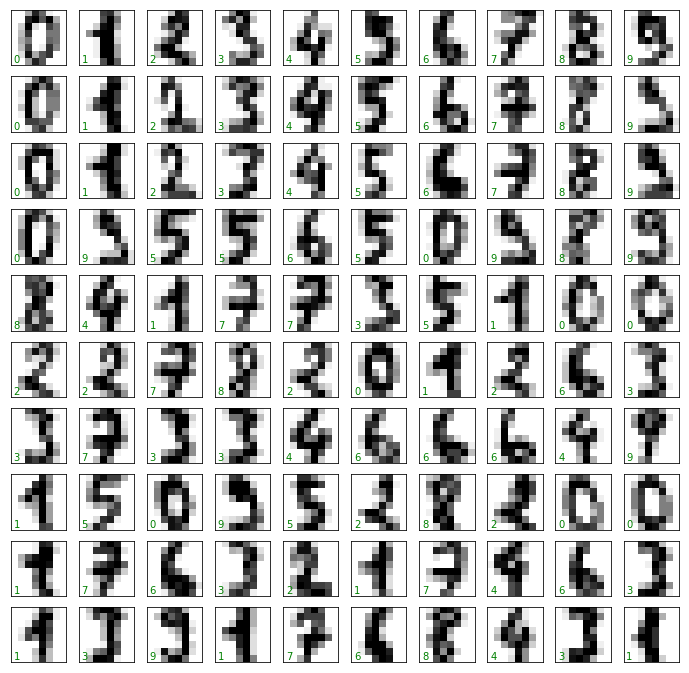

In [11]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12),
                         subplot_kw={'xticks':[], 'yticks':[]})

# Move the target value (text) to the bottom by transforming the axes
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]), color='green',
            transform=ax.transAxes)

In order to work with this data within Scikit-Learn, we need a two-dimensional, ``[n_samples, n_features]`` representation.
We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.
Additionally, we need the target array, which gives the previously determined label for each digit.
These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively:

In [12]:
# Grab all data (1797 records, and 8x8=64 columns)

X = digits.data
X.shape

(1797, 64)

In [13]:
# Grab the target (true) value for each image

y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

In [14]:
# View the first two records

X[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [15]:
# View the first 20 target values

y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Classification on digits

Let's apply a classification algorithm to the digits.
[W]e will split the data into a training and testing set, and fit a [Decision Tree] model:

In [16]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=314)

In [17]:
# The default is 75% train and 25% test
len(Xtrain), len(Xtest)

(1347, 450)

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Define the model (object)
clf = DecisionTreeClassifier()

# Fit (train) the model
clf.fit(Xtrain, ytrain)

# Make predictions on the test data
y_model = clf.predict(Xtest)

Now that we [generated predictions using] our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8244444444444444

With even this extremely simple model, we find about 80% accuracy for classification of the digits!
However, this single number doesn't tell us *where* we've gone wrong—one nice way to do this is to use the *confusion matrix*, which we can compute with Scikit-Learn and plot with Seaborn:

In [20]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
mat

array([[42,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  1,  4,  1],
       [ 0,  7, 33,  1,  1,  0,  0,  0,  2,  0],
       [ 0,  1,  0, 35,  0,  1,  0,  1,  4,  0],
       [ 0,  1,  0,  1, 33,  1,  3,  1,  2,  5],
       [ 0,  0,  0,  0,  1, 37,  0,  0,  2,  0],
       [ 1,  0,  0,  0,  2,  1, 36,  0,  0,  0],
       [ 0,  3,  0,  2,  1,  0,  0, 45,  0,  1],
       [ 1,  6,  2,  2,  0,  1,  1,  0, 37,  1],
       [ 1,  2,  0,  1,  1,  2,  0,  0,  3, 31]], dtype=int64)

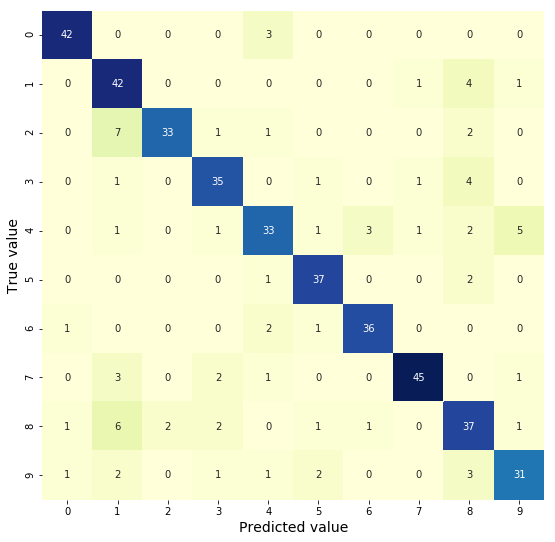

In [21]:
# Plot the confusion matrix

import seaborn as sns
plt.figure(figsize=(9, 9))

sns.heatmap(mat, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('True value', fontsize=14);

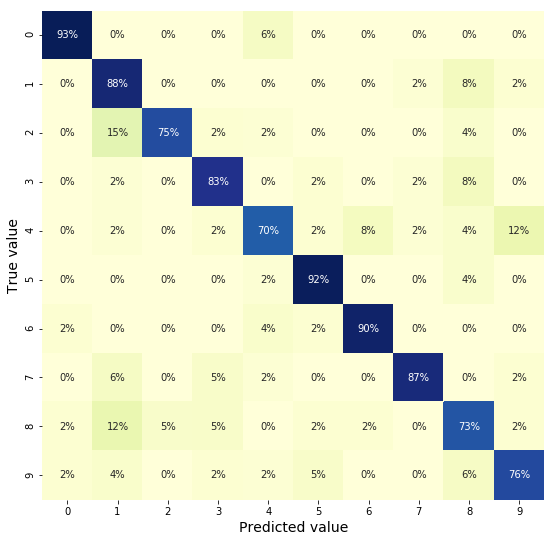

In [22]:
mat_pctg = mat / mat.sum(axis=1)

plt.figure(figsize=(9, 9))

sns.heatmap(mat_pctg, annot=True, cbar=False, cmap="YlGnBu", fmt='0.0%')
plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('True value', fontsize=14);

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
We'll use green for correct labels, and red for incorrect labels:

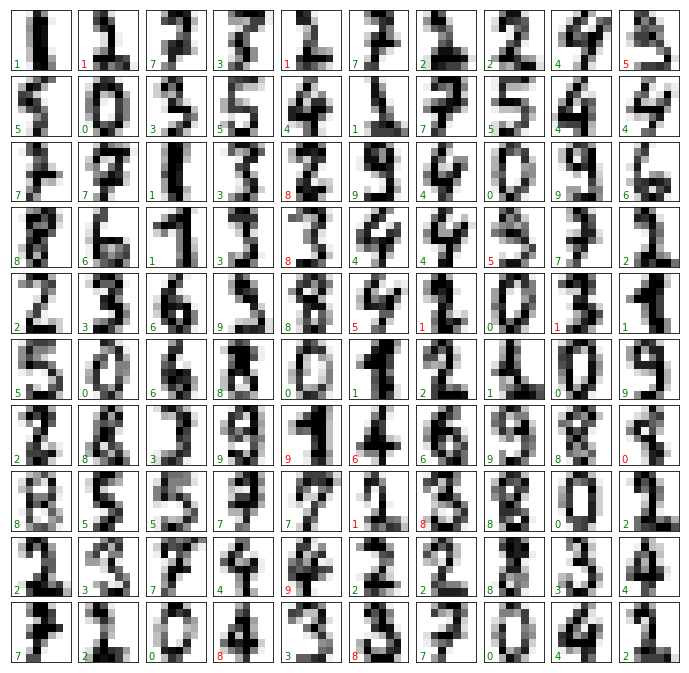

In [23]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally.
To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), random forests (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)) or another classification approach.

### Exercise: Build a model using Random Forest and plot the confusion matrix

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Define the model (object)
rfc = RandomForestClassifier()

# Fit (train) the model
rfc.fit(Xtrain, ytrain)

# Make predictions on the test data
y_model = rfc.predict(Xtest)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9422222222222222

Confusion matrix:

In [28]:
cmat = confusion_matrix(ytest, y_model)
cmat

array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  1,  0,  2,  0],
       [ 0,  2, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  1],
       [ 0,  0,  1,  0,  1, 38,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  2,  2,  1,  1,  0,  0,  0, 44,  1],
       [ 0,  1,  0,  2,  0,  1,  0,  0,  2, 35]], dtype=int64)

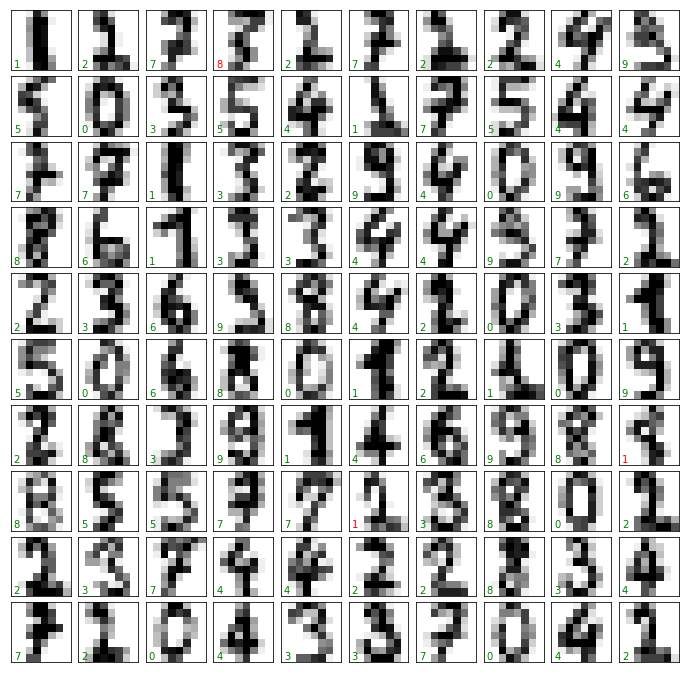

In [29]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

## Manual Test

In [51]:
import imageio as img
from skimage.transform import resize
import warnings

warnings.filterwarnings("ignore")

# read the sample image
sample = plt.imread("1.png")

# convert the image into the desired shape/format
sample = resize(sample, (8, 8))
sample = sample[:, :, 0]
sample = sample.reshape((1, sample.shape[0]*sample.shape[1]))

warnings.filterwarnings("default")

# predict the digit using the model
rfc.predict(sample)

array([5])

More on 'Hand-written Digits Recognition': https://www.kaggle.com/c/digit-recognizer